<a href="https://colab.research.google.com/github/namitasathish/Spam-Mail-Prediction/blob/main/spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Data Collection

In [5]:
data=pd.read_csv("/content/mail_data.csv")

In [6]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

the data is not reliable- NEED TO APPLY UNDERSAMPLING

In [8]:
data.shape

(5572, 2)

filling null values

In [9]:
mdata=data.where((pd.notnull(data)),"")

#Label Encoding

spam=0 ham=1

In [10]:
mdata.loc[mdata["Category"]=="spam","Category",]=0
mdata.loc[mdata["Category"]=="ham","Category",]=1

separating text and labels

In [11]:
x=mdata["Message"]
y=mdata["Category"].astype(int)

#Undersampling

In [12]:
#separating text and labels
spam = mdata[mdata["Category"] == 0]
ham = mdata[mdata["Category"] == 1]

# Sample the same number of instances from the ham class as there are in the spam class
ham_sample = ham.sample(n=len(spam), random_state=42)

# Concatenate
newdata = pd.concat([ham_sample, spam], axis=0)

# new features and labels
x = newdata["Message"]
y = newdata["Category"].astype(int)


#Training and test data

In [13]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,train_size=0.2,stratify=y, random_state=3)

In [14]:
print(x.shape, xtest.shape, xtrain.shape)

(1494,) (1196,) (298,)


#Feature extraction-text data to numerical data

In [15]:
f=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [16]:
xtrainf=f.fit_transform(xtrain)

In [17]:
xtestf=f.transform(xtest)

#Training the model

In [18]:
model=LogisticRegression()
model.fit(xtrainf, ytrain)

LogisticRegression()

accuracy on training data

In [19]:
xtrainp=model.predict(xtrainf)
traindataacc=accuracy_score(xtrainp, ytrain)

In [20]:
print(traindataacc)

1.0


In [21]:
xtestp=model.predict(xtestf)
testdataacc=accuracy_score(xtestp, ytest)

In [22]:
print(testdataacc)

0.9381270903010034


#Predictive system

In [23]:
#Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or Â£1000. To claim txt DIS to 87121 18+6*Â£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1
#07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow
#This is the 2nd time we have tried 2 contact u. U have won the Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.
#GENT! We are trying to contact you. Last weekends draw shows that you won a Â£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
input=["hello how are you?, looking soon to hear back from you, with love mom"]


inputf=f.transform(input)

prediction=model.predict(inputf)
print(prediction)
if(prediction[0]==1):
  print("This is not a spam mail")
else:
  print("this is a spam mail")



[1]
This is not a spam mail


#Visualizing catagory distribution in the dataset

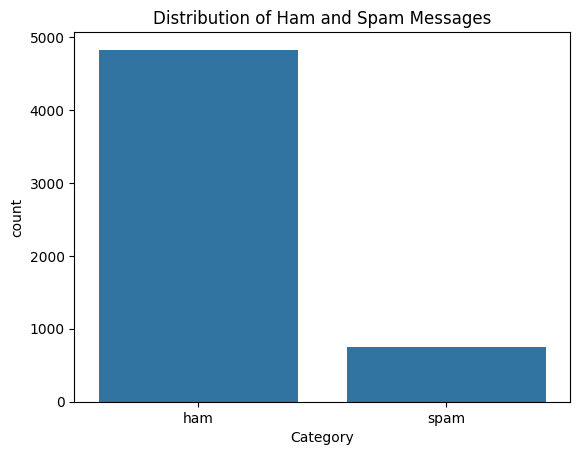

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='Category')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

#Performance of the model

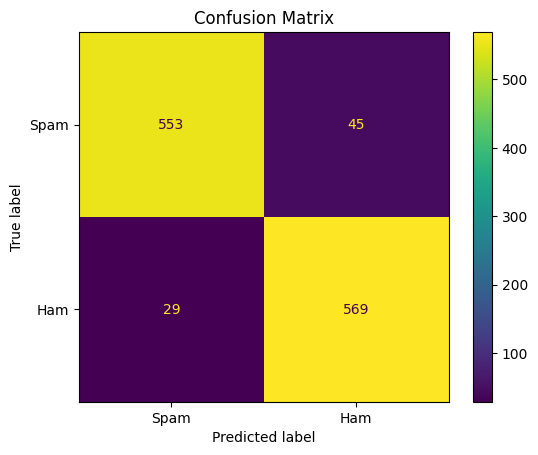

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ypred = model.predict(xtestf)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()